# Part I - (Used Car Data Exploration)
## by (David Kayode Oluwadare)

## Introduction
> There is an automobile company 'KKFOSU' in the India which aspires to enter the used-car market by setting up their company locally to give competition to their counterparts. Based on various market surveys, the consulting firm has gathered a large dataset of different types of used   cars across the market.


#### Data Dictionary:

* Sales_ID (Sales ID)
* name (Name of the used car)
* year (Year of the car purchase)
* selling_price (Current selling price for used car)
* km_driven (Total km driven)
* Region (Region where it is used)
* State or Province (State or Province where it is used)
* City (City where it is used)
* fuel (Fuel type)
* seller_type (Who is selling the car)
* transmission (Transmission type of the car)
* owner (Owner type)
* mileage (Mileage of the car)
* engine (engine power)
* max_power (max power)
* seats (Number of seats)
* sold (used car sold or not)




## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
print('Start')

Start


In [2]:
# load in the dataset into a pandas dataframe
car = pd.read_csv('UserCarData.csv')

In [3]:
# Display header
car.head()

,Sales_ID,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold
0,1,Maruti,2014,450000,145500,East,District of Columbia,Washington,Diesel,Individual,Manual,First_Owner,23.40,1248,74.00,190Nm@ 2000rpm,5,Y
1,2,Skoda,2014,370000,120000,East,New York,New York City,Diesel,Individual,Manual,Second_Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5,Y
2,3,Honda,2006,158000,140000,Central,Illinois,Chicago,Petrol,Individual,Manual,Third_Owner,17.70,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5,Y
3,4,Hyundai,2010,225000,127000,Central,Illinois,Chicago,Diesel,Individual,Manual,First_Owner,23.00,1396,90.00,22.4 kgm at 1750-2750rpm,5,Y
4,5,Maruti,2007,130000,120000,East,New York,New York City,Petrol,Individual,Manual,First_Owner,16.10,1298,88.20,"11.5@ 4,500(kgm@ rpm)",5,Y


In [4]:
# Display columns of dataframe
car.columns

Index(['Sales_ID', 'name', 'year', 'selling_price', 'km_driven', 'Region',
       'State or Province', 'City', 'fuel', 'seller_type', 'transmission',
       'owner', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'sold'],
      dtype='object')

### What is the structure of the dataset?
There are 7906 Sales IDs in the dataset with 18 features ('Sales_ID', 'name', 'year','selling_price', 'km_driven', 'Region','State or Province', 'City', 'fuel', 'seller_type', 'transmission','owner', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'sold'). 

Most variables are categorical in nature, but the variables 'Sales_id', 'year','km_driven, 'selling_price', 'km_driven' 'mileage', 'engine','seats' are numerical factor variables. The 'torque' variable is arguably not needed in the project.

* Sales_ID (Numerical)
* name (Categorical)
* year (Numerical)
* selling_price (Numerical)
* km_driven (Numerical)
* Region (Categorical)
* State or Province (Categorical)
* City (Categorical)
* fuel (Categorical)
* seller_type (Categorical)
* transmission (Categorical)
* owner (Categorical)
* mileage (Numerical)
* engine (Numerical)
* max_power (Numerical)
* seats (Numerical)
* sold (Categorical)

In [5]:
# high-level overview of data shape and composition to confirm for the dataset structure
print(car.shape)
car.info()

(7906, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7906 entries, 0 to 7905
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sales_ID           7906 non-null   int64  
 1   name               7906 non-null   object 
 2   year               7906 non-null   int64  
 3   selling_price      7906 non-null   int64  
 4   km_driven          7906 non-null   int64  
 5   Region             7906 non-null   object 
 6   State or Province  7906 non-null   object 
 7   City               7906 non-null   object 
 8   fuel               7906 non-null   object 
 9   seller_type        7906 non-null   object 
 10  transmission       7906 non-null   object 
 11  owner              7906 non-null   object 
 12  mileage            7906 non-null   float64
 13  engine             7906 non-null   int64  
 14  max_power          7906 non-null   float64
 15  torque             7906 non-null   object 
 16  seats        

In [6]:
# Number of the cars 
car.name.nunique()

31

In [7]:
# Check null values
car.isnull().sum()

Sales_ID             0
name                 0
year                 0
selling_price        0
km_driven            0
Region               0
State or Province    0
City                 0
fuel                 0
seller_type          0
transmission         0
owner                0
mileage              0
engine               0
max_power            0
torque               0
seats                0
sold                 0
dtype: int64

#### OBSERVATION & DECISIONS
Following observations can be made from the following results

* There are no null records in any columns
* There are 31 differsnt cars in the data 
* According to data type there are 8 numerical and 9 categorical columns.
* Will have to drop torque column as it doesn't really much in the analysis.

In [8]:
#Drop the unnecessary columns (torque and max_power)
car.drop(columns=['torque','max_power'], axis= 1, inplace=True)

### Feature(s) of interest in the dataset that will help support  investigation

* Sales_ID (ID)
* name (Cartegorical)
* year (Categorical)
* selling_price (Numerical)
* km_driven (Numerical)
* State or Province (Categorical)
* fuel (Categorical)
* seller_type (Cartegorical)
* Region (Region where it is used)
* mileage (Numerical)
* engine (Numerical)
* owner (Categorical)
* seats (Numerical)
* sold (Categorical)     
* transmission (Categorical)

### Main feature(s) of interest in the dataset?

* mileage (Numerical)
* km_driven (Numerical)
* selling_price (Numerical)
* sold (Categorical)
* Region (Region where it is used)
* fuel (Categorical)
* seats (Numerical)
* owner (Categorical)
* transmission (Categorical)
* State or Province (Categorical)
* name (Cartegorical)
* year (Categorical)
* seller_type (Cartegorical)
* engine (Numerical)

## Univariate Exploration

> **Project Rubic :**
In this section, i will investigate distributions of individual variables, looking to find unusual points or outliers, taking a deeper look to clean things, preparing myself to look at relationships between variables.

> I will be using the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.**

In [9]:
# Displaying random three row samples of the data frame
car.sample(3)

,Sales_ID,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,seats,sold
7420,7635,Honda,2015,700000,22700,West,Utah,Murray,Petrol,Individual,Manual,First_Owner,18.70,1199,5,N
4340,4473,Maruti,2013,300000,57000,Central,Missouri,Saint Joseph,Petrol,Individual,Manual,Second_Owner,20.51,998,5,N
5007,5152,Ford,2011,225000,90000,West,California,Pomona,Diesel,Individual,Manual,Second_Owner,20.00,1399,5,N


In [10]:
# high-level overview of data statistics using the pandas describe method
car.describe()

,Sales_ID,year,selling_price,km_driven,mileage,engine,seats
count,7906.000000,7906.000000,7.906000e+03,7.906000e+03,7906.000000,7906.000000,7906.000000
mean,4070.106248,2013.983936,6.498137e+05,6.918866e+04,19.419861,1458.708829,5.416393
std,2345.770159,3.863695,8.135827e+05,5.679230e+04,4.036263,503.893057,0.959208
min,1.000000,1994.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,2.000000
25%,2037.250000,2012.000000,2.700000e+05,3.500000e+04,16.780000,1197.000000,5.000000
50%,4076.500000,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,5.000000
75%,6102.000000,2017.000000,6.900000e+05,9.542500e+04,22.320000,1582.000000,5.000000
max,8128.000000,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,14.000000


#### I'll start by looking at the distribution of the main variable of interest:

> What are the highest **Mileages** of cars in the data set?
  
> **Kilometer Driven** by Cars?
  
> Distribution of **Selling price** of car? 

> Distribution of **Used** sold cars? 
  
> Distrbution of cars by **Region**? 

> **Fuel** used by car engine?

> Number of car **seats**

> Distribution of Car **Owners** 

> **Transmission** type of the car

> **State/Province** where it is used

> **Name** of used car

> **Year** of car purchase

> **Seller type** of the cars

> Car **Engine Power**

In [11]:
# Defining a callable function to avoid repetition for Categorical features [viz1]
def viz1(col, file):
    
    #Fixed figure size
    plt.figure(figsize = [8, 5])
    peterpaker = sb.countplot(x=col, data=file, palette ='muted')

In [12]:
# Defining a callable function to avoid repetition for Numerical features [viz2]
def viz2(col, file):
    
    #Fixed figure size
    plt.figure(figsize = [15, 10])
    base_color = sb.color_palette()[0]
    sb.countplot(y=col,  data=file, color = base_color)

### What are the highest mileages of cars in the data set?

In [13]:
#Value counts of the mileage
car.mileage.value_counts()

18.90    225
19.70    173
18.60    164
21.10    158
17.00    133
        ... 
16.73      1
17.97      1
32.52      1
13.38      1
12.50      1
Name: mileage, Length: 381, dtype: int64

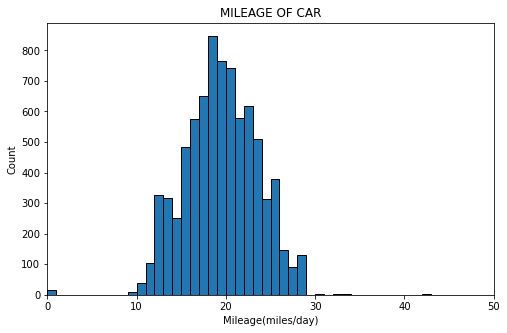

In [47]:
#Create a standard figure size
plt.figure(figsize = [8, 5]) 

#Matplotlib plotting with a generated bins
binsize= 2.0
bins=np.arange(0, car.mileage.max()+binsize, 1.0)
plt.hist(data=car, x='mileage', bins=bins, edgecolor='black')
plt.title('MILEAGE OF CAR')
plt.xlabel('Mileage(miles/day)')
plt.ylabel('Count')
plt.xlim(0, 50)
plt.show()

The highest Mileages are around 18-21 miles

### Kilometer Driven by Cars

C:\Users\Owner\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


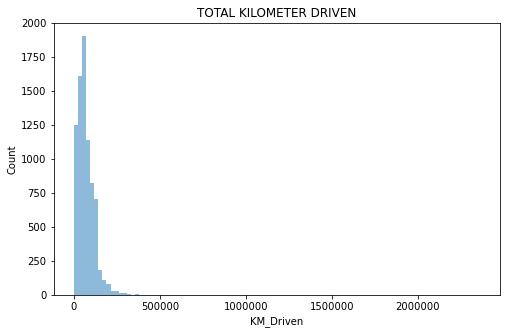

In [15]:
#Create a standard figure size
plt.figure(figsize = [8, 5]) 

#Matplotlib plotting with a fixed bins 100
ax = plt.gca()
ax.ticklabel_format(style='plain')
sb.distplot(car['km_driven'], kde = False, bins = 100, hist_kws = {'alpha': 1/2})
ax.set_title('TOTAL KILOMETER DRIVEN')
ax.set_xlabel('KM_Driven')
ax.set_ylabel('Count');

In [16]:
#Check the statistics of km driven
car.km_driven.describe()

count    7.906000e+03
mean     6.918866e+04
std      5.679230e+04
min      1.000000e+00
25%      3.500000e+04
50%      6.000000e+04
75%      9.542500e+04
max      2.360457e+06
Name: km_driven, dtype: float64

From the statistics above the highest km driven is about 2,360,457km 

### Distribution of selling price of car

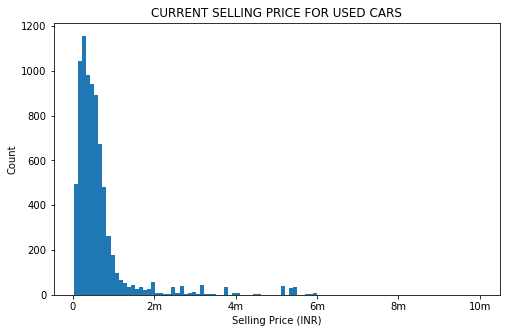

In [17]:
#Create a standard figure size
plt.figure(figsize = [8, 5]) 

#Matplotlib plotting with a fixed bins 100
ax = plt.gca()
ax.ticklabel_format(style='plain')
ax = sb.distplot(car.selling_price, kde=False, bins= 100, hist_kws = {'alpha': 1})
ax.set_title('CURRENT SELLING PRICE FOR USED CARS')
ax.set_xlabel('Selling Price (INR)')
ax.set_ylabel('Count')

#convert the x-axis to a exponential figure
plt.xticks([0, 2e6, 4e6, 6e6, 8e6, 10e6], [0, '2m','4m','6m','8m','10m'])
plt.show();

In [18]:
#Check the modal occurrence of the car selling price
car.selling_price.mode()

0    300000
dtype: int64

In [19]:
#Check the value counts to confirm occurrence of the car selling price
car.selling_price.value_counts()

300000     221
600000     211
350000     204
550000     204
450000     194
          ... 
731000       1
1365000      1
1445000      1
1251000      1
1237000      1
Name: selling_price, Length: 670, dtype: int64

The price ranges from 0-6million INR, the most occurred price is 300,000 INR

### Distribution of Used sold cars

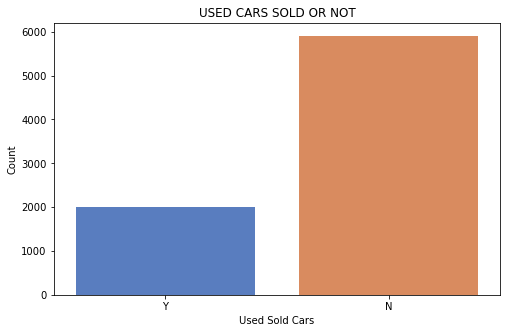

In [20]:
#Setting Variable to the Defined Function Viz1
sold = car.sold
df = car
viz1(sold, df)

plt.title('USED CARS SOLD OR NOT')
plt.xlabel('Used Sold Cars')
plt.ylabel('Count');

In [21]:
#Check the value counts to confirm occurrence of the used sold cars
car.sold.value_counts()

N    5906
Y    2000
Name: sold, dtype: int64

Asking the question of used sold cars was facinating, because the cars that weren't sold are more than the sold cars. From the statistics of Km Driven, it can be inferred that majoirty of the cars have not been driven much as the **VIABLE** maximum car has moved above 500,000 km and this could also be a reason that less number of cars are being sold.

### Distrbution of cars by Region

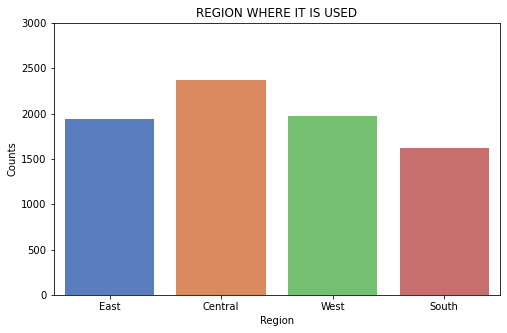

In [22]:
#Setting Variable to the Defined Function Viz1
region = car.Region
df=car
viz1(region, df)

plt.title('REGION WHERE IT IS USED')
plt.xlabel('Region')
plt.ylabel('Counts');
#set_ylimit
plt.ylim((0,3000));

In [23]:
car['Region'].value_counts()

Central    2376
West       1976
East       1939
South      1615
Name: Region, dtype: int64

Distribution of car by Region shows that the Central region have more distribution of cars more followed by the West, East and lastly the South Region

Creating a relative frequency plot of the proportion of car with each region, sorted from most frequent to least

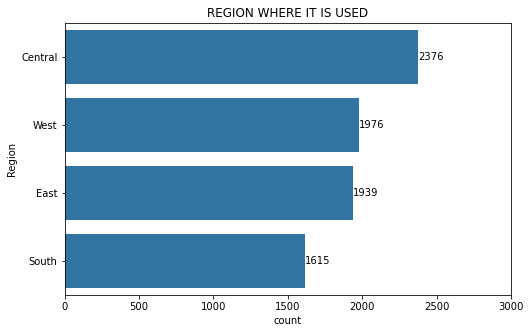

In [26]:
#Creating a relative frequency plot of the proportion of car with each region, sorted from most frequent to least
#Fixed figure size
plt.figure(figsize = [8, 5]) 

#Set base color
base_color = sb.color_palette()[0]

#Put Region column value counts in a list
reg_count = car['Region'].value_counts()
reg_order = reg_count.index

#Plot
sb.countplot(data = car, y='Region', color = base_color, order = reg_order )
listing = list(reg_count)

#Loop within the reg_count list
for index, value in enumerate(listing):
    plt.text(value,index, str(value), va = 'center')
    plt.title('REGION WHERE IT IS USED')
    plt.ylabel('Region')

#set_ylimit
plt.xlim((0,3000))
plt.show()

### Fuel used by car engine

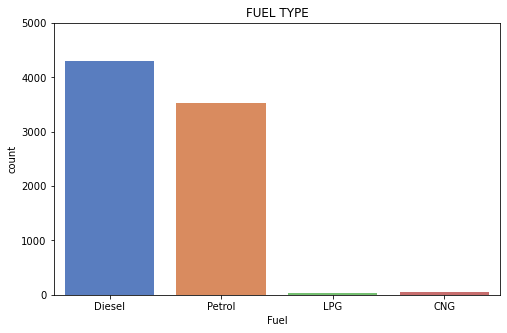

In [27]:
#Setting Variable to the Defined Function Viz1
fuel = car.fuel
df=car
viz1(fuel, df)

plt.title('FUEL TYPE')
plt.xlabel('Fuel')
plt.ylim((0,5000));

 Most of the cars in the dataset are either petrol or diesel based. The diesel is the highest fuel type

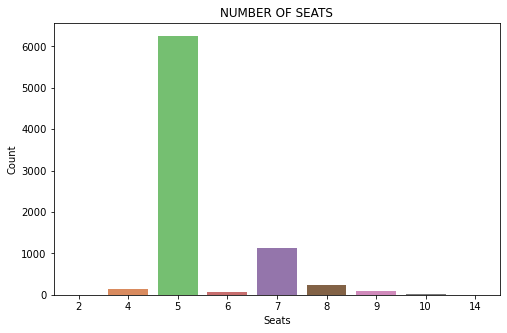

In [28]:
#Setting Variable to the Defined Function Viz1
seat = car.seats
df = car    
viz1(seat, df)


plt.title('NUMBER OF SEATS')
plt.xlabel('Seats')
plt.ylabel('Count');

Most of the cars have more of 5 number of seats, followed by 7 seats

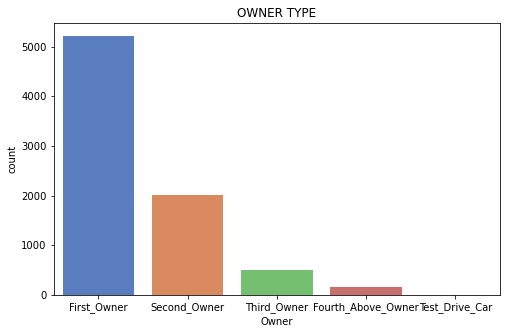

In [29]:
#Setting Variable to the Defined Function Viz1
owner = car.owner
df = car
viz1(owner, df)

plt.title('OWNER TYPE')
plt.xlabel('Owner');

Individual owner type is the highest owner type , above 5000.

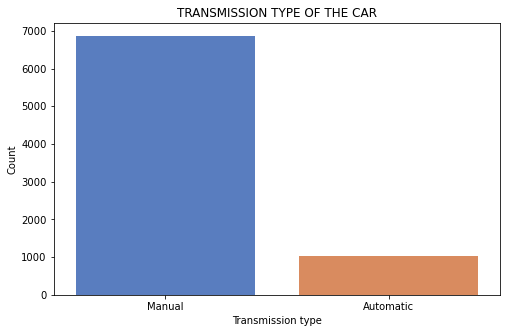

In [30]:
#Setting Variable to the Defined Function Viz1
transmission = car.transmission
df = car
viz1(transmission, df)

plt.title('TRANSMISSION TYPE OF THE CAR')
plt.xlabel('Transmission type')
plt.ylabel('Count');

Manual transmission is the highest transmission type of the cars.

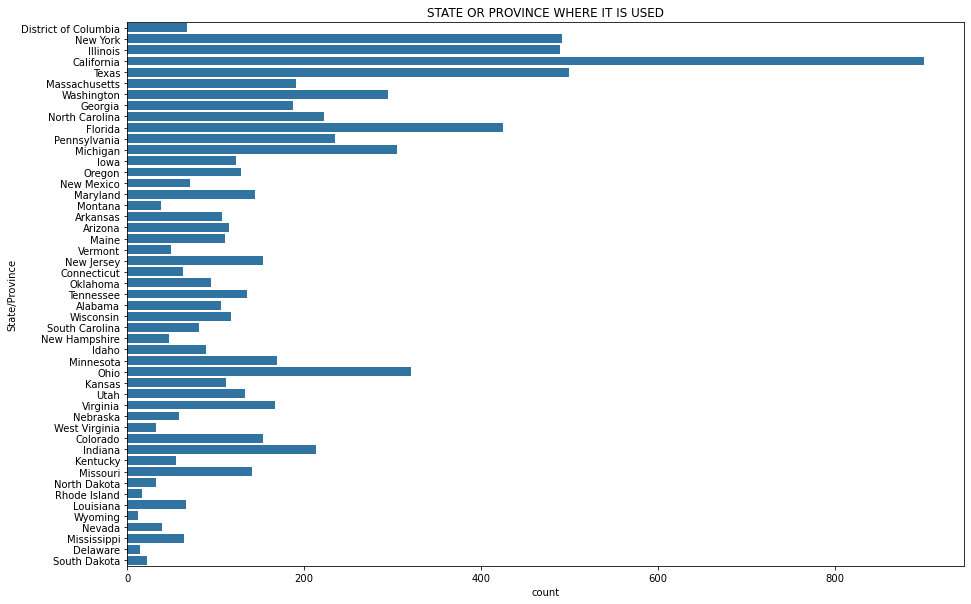

In [31]:
#Setting Variable to the Defined Function Viz1
stateProvince = car['State or Province']
df = car
viz2(stateProvince, df)

plt.title('STATE OR PROVINCE WHERE IT IS USED')
plt.ylabel('State/Province');

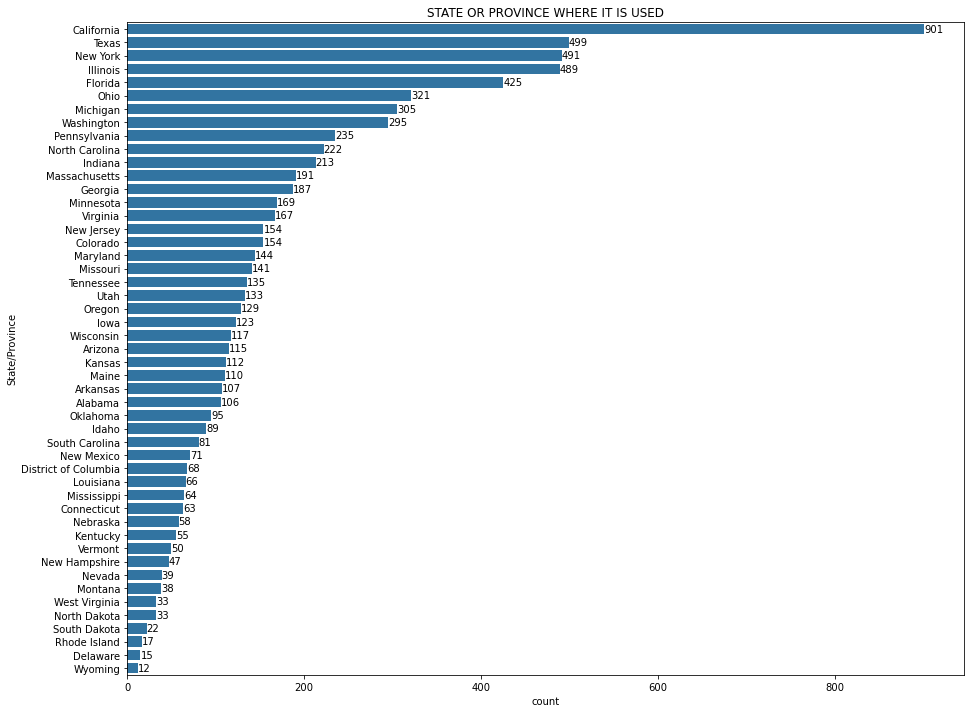

In [32]:
#Creating a relative frequency plot of the proportion of Cars with each State/Province, sorted from most frequent to least.

#Fixed figure size
plt.figure(figsize = [15, 12])

#Put State or Province column value counts in a list
type_counts = car['State or Province'].value_counts()
type_order = type_counts.index

#Plot
sb.countplot(data = car, y='State or Province', color = base_color, order = type_order )
listing = list(type_counts)

#Loop within the type_count list
for index, value in enumerate(listing):
    plt.text(value, index, str(value),  va = 'center')
    plt.title('STATE OR PROVINCE WHERE IT IS USED')
    plt.ylabel('State/Province')

plt.show()

California is the highest from the state/provonce where thee cars are mostly used and Wyoming is the least

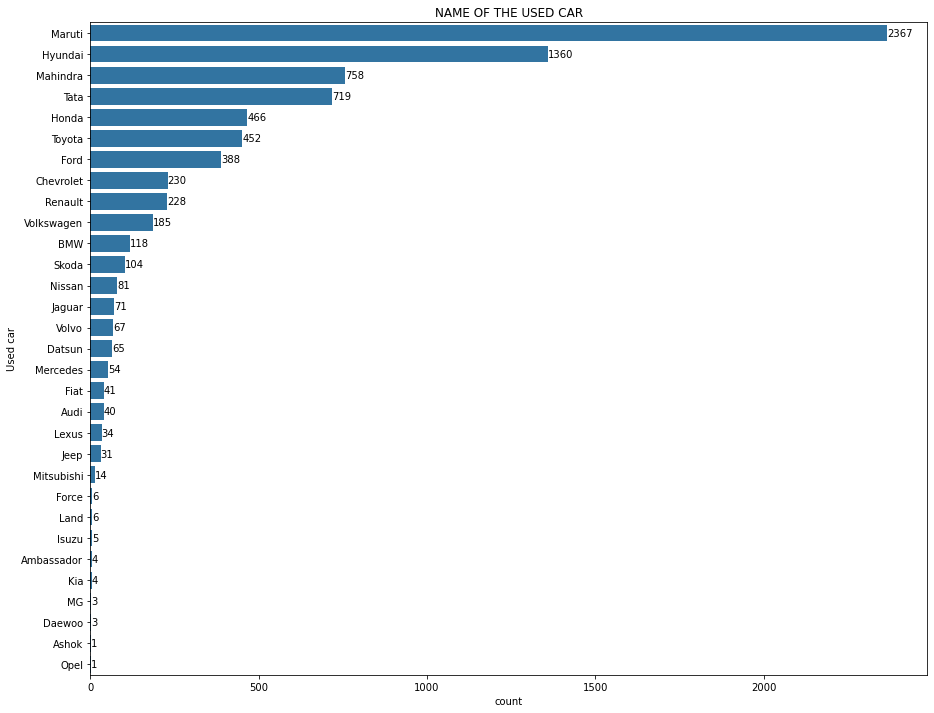

In [33]:
#Creating a relative frequency plot of the proportion of Cars Name, sorted from most frequent to least.

#Fixed figure size
plt.figure(figsize = [15, 12])

#Put name column value counts in a list
type_counts = car['name'].value_counts()
type_order = type_counts.index

#Plot
sb.countplot(data = car, y='name', color = base_color, order = type_order )
listing = list(type_counts)

#Loop within the type_count list
for index, value in enumerate(listing):
    plt.text(value, index, str(value),  va = 'center')
    plt.title('NAME OF THE USED CAR')
    plt.ylabel('Used car')

plt.show()

Maruti (2367) is the highest in occurrence of the used cars and Opel (1) is the least

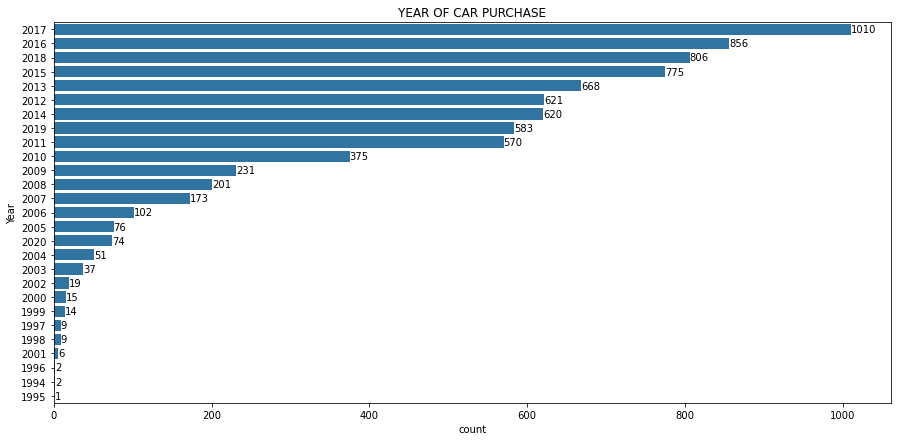

In [34]:
#Creating a relative frequency plot of the proportion of Cars Year of car purchase, sorted from most frequent to least.

#Fixed figure size
plt.figure(figsize = [15, 7])

#Put year column value counts in a list
type_counts = car['year'].value_counts()
type_order = type_counts.index

#Plot
sb.countplot(data = car, y='year', color = base_color, order = type_order )
listing = list(type_counts)

#Loop within the type_count list
for index, value in enumerate(listing):
    plt.text(value, index, str(value),  va = 'center')
    plt.title('YEAR OF CAR PURCHASE')
    plt.ylabel('Year')

plt.show()

2017 became the year cars were sold the most. 1010 cars was sold in the year 2017, and just a car was sold in the year 1995

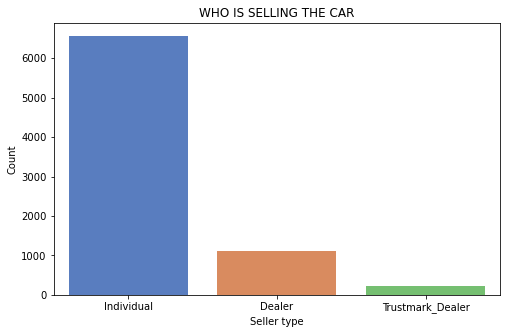

In [35]:
#Setting Variable to the Defined Function Viz1
seller_type = car.seller_type
df = car
viz1(seller_type, df)

plt.title('WHO IS SELLING THE CAR')
plt.xlabel('Seller type')
plt.ylabel('Count');

Individual seller type are the highest followed by the Dealer seller type.

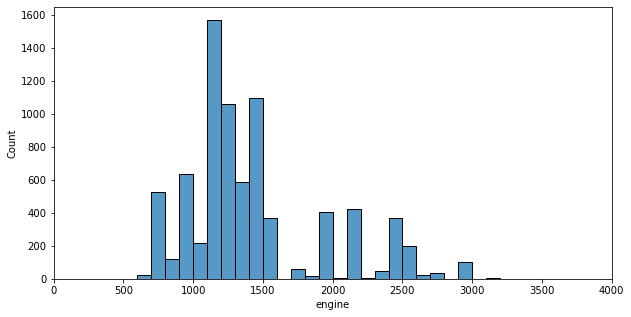

In [38]:
#Fixed figure and bin size
plt.figure(figsize = [10, 5])
bins = np.arange(0, car['engine'].max()+5, 100) 

ax = sb.histplot(car['engine'], kde=False, bins=bins);
ax.set_xlim([0, 4000]);

The engine is at highest around 1100-1300

### Distribution(s) of my variable(s) of interest

> What are the highest mileages of cars in the data set? : The highest Mileages are around 18-21
  
> Kilometer Driven by Cars : Majoirty of the cars have not been driven much as the maximum car has moved 2,360,457km, and the **viable** movement is slightly above 500,000km 
  
> Distribution of selling price of car : Most of the selling price falls between (0 -2m) and the highest occurrence is 300k in INR

> Distribution of Used sold cars : Most of the cars are yet to be sold, about 2,000 sold and 5,906 yet to be sold
  
> Distrbution of cars by Region : Distribution of car by Region shows that the Central region have more distribution of cars more followed by the West, East and lastly the South Region

> Fuel used by car engine : Most of the car engines in the dataset are either petrol or diesel based

> Number of car seats : More than 6000 cars uses 5 car seats, More than 1000 cars uses 7 car seats
  
> Distribution of Car Owners : More than 5000 cars are from the First owner. Close to 2000 cars are from second owner less than 1000 cars are shared by the rest of the owner type (Third, Fouth, and Test Drive car)

> Transmission type of the car : There is a relatively high Manual transmaission compared to Automatic

> State/Province where it is used : California (901) has the highest Stae where the car are used followed by Texas(499)

> Name of used car : Marauti(2367) and Hyundai(1360) are the highest in Used cars. The rest Used cars are below 800 by count

> Year of car purchase : 2017 was the highest year used car was purchased the most. 1010 Used cars was purchased.
  
> Seller Type : There are three seller type after visualizing the column, individual seller hit the highest point of over 6000 counts followed by dealer and Trust mark dealer with 1000 and greatly less than 1000 respectively
  
> Engine Power : The engine is at highest around 1100-1300.
  

## Bivariate Exploration

> In this section, i will investigate relationships between pairs of variables in my data. Making sure the variables that i cover here have been introduced in some
fashion in the previous section (univariate exploration).

> I will also be using the "Question-Visualization-Observations" framework throughout the exploration. This framework involves asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.

**QVB 1**

**Individual seller_type is the highest seller for the Used cars, but, What are the cars with the       highest individual seller type?**

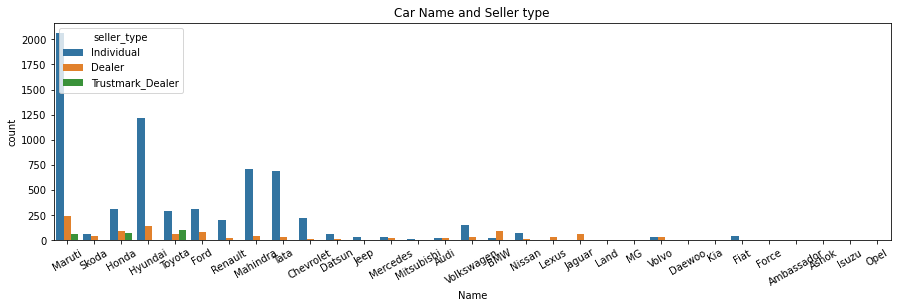

In [39]:
#Fixed figure size
plt.figure(figsize = [15, 4])

#Plot
sb.countplot(data = car, x = 'name', hue = 'seller_type')

#Plot title, xlabel and ticks
plt.title('Car Name and Seller type')
plt.xlabel('Name')
plt.xticks(rotation=30);

From the count plot, it is seen the Maruti, Hyundai, Mahindra, Tata are clearly the cars with the most individual Seller_Type.

**QVB 2**

**Petrol is the highest fuel used followed by Diesel, but, What are the cars with the highest petrol usage?**

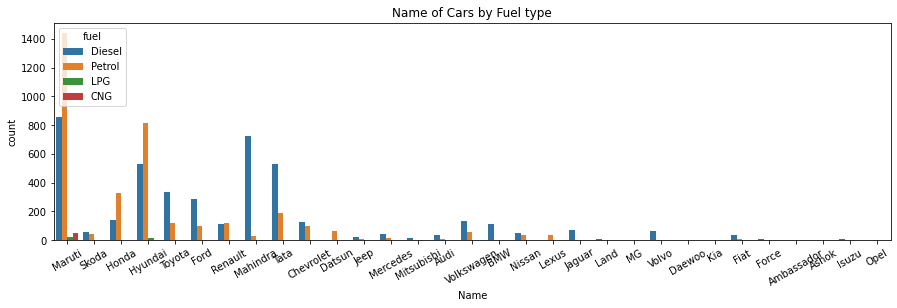

In [40]:
#Fixed figure size
plt.figure(figsize = [15, 4])

#Plot
sb.countplot(data = car, x = 'name', hue = 'fuel')

#Plot title, xlabel and ticks
plt.title('Name of Cars by Fuel type')
plt.xlabel('Name')
plt.xticks(rotation=30);

Maruti and Hyundai, have petrol as their highest fuel usage, while; Toyota, Ford, Mahindra, Tata, are the cars with the highest Diesel usage 

**QVB 3**

**Close to 7000 cars are of Manual transmission, but, What are the cars with the highest manual transmission?**

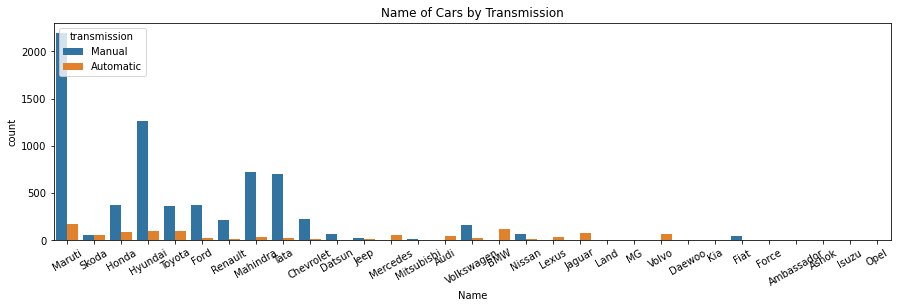

In [41]:
#Fixed figure size
plt.figure(figsize = [15, 4])

#Plot
sb.countplot(data = car, x = 'name', hue = 'transmission')

#Plot title, xlabel and ticks
plt.title('Name of Cars by Transmission')
plt.xlabel('Name')
plt.xticks(rotation=30);

Just to mention a few from the visualization, Maruti, Hyundai, Mahindra, Tata are the cars with the highest Manual transmission, and cars like Mercedes, BMW, Lexus, Jaguar, Volvo are the cars with the highest Automatic Transmission

**QVB 4**

**Which cars were sold and which are not sold yet?**

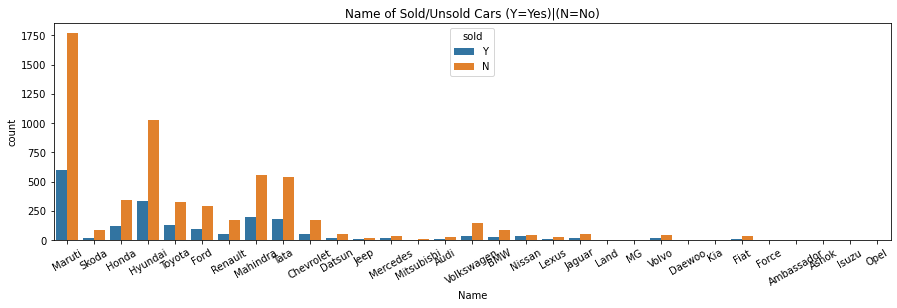

In [43]:
#Fixed figure size
plt.figure(figsize = [15, 4])

#Plot
sb.countplot(data = car, x = 'name', hue = 'sold')

#Plot title, xlabel and ticks
plt.title('Name of Sold/Unsold Cars (Y=Yes)|(N=No)')
plt.xlabel('Name')
plt.xticks(rotation=30);

Most of the used cars have not been sold. Marauti have the highest number of unsold cars followed by Hyundai, Mahindra, Tata...

**QVB 5**

**What are the range of mileages and kilometer driven by the cars?**

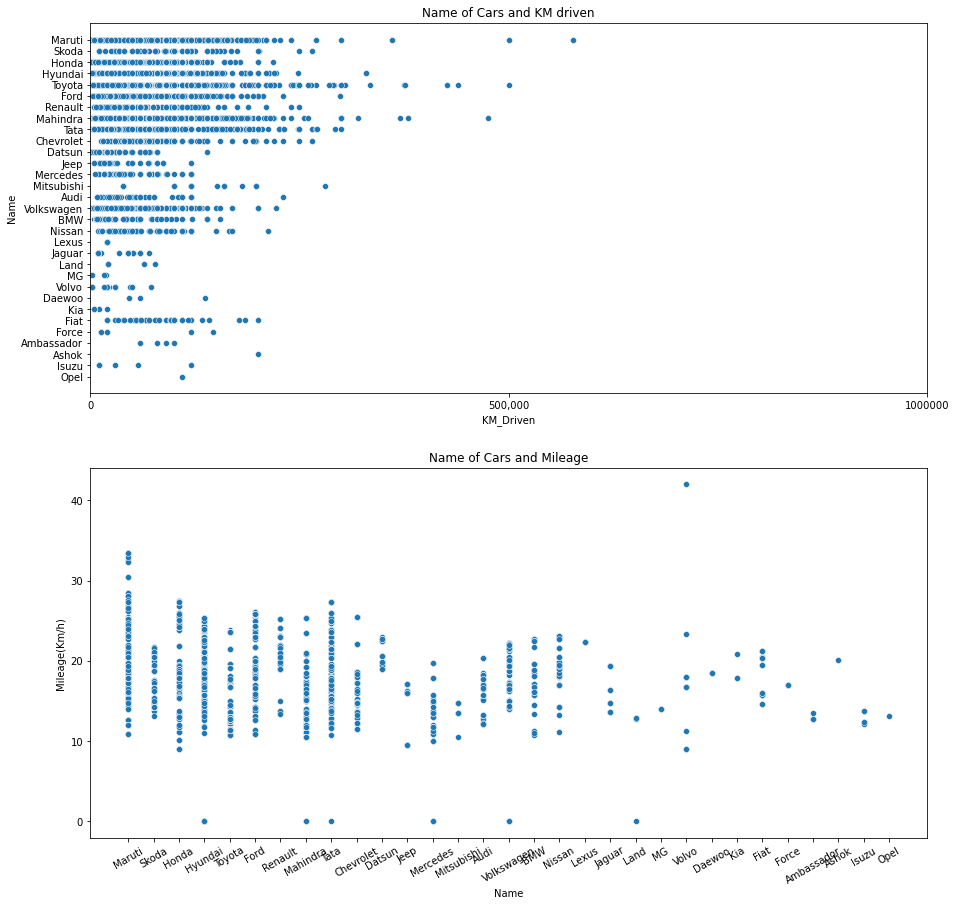

In [44]:
# Resize figure to accommodate two plots
plt.figure(figsize = [15, 15])

#First subplot
plt.subplot(2,1,1)

#Plot
ax = sb.scatterplot(data = car, y= 'name', x = 'km_driven')
#convert the x-axis to a exponential figure
#The km driven at the left having 1.0(1e6) = 1e6 = 1000000 and same thing goes for 1.5,2.0..
plt.xticks([0, 0.5e6, 1.0e6], [0, '500,000','1000000'])
ax.set_xlim([0, 1000000])

#Plot title, xlabel, ylabel
plt.title('Name of Cars and KM driven')
plt.xlabel('KM_Driven')
plt.ylabel('Name')

#Second subplot
plt.subplot(2,1,2)

#Plot
sb.scatterplot(data = car, x = 'name', y = 'mileage')

#Plot title, xlabel, ylabel,ticks
plt.title('Name of Cars and Mileage')
plt.xlabel('Name')
plt.ylabel('Mileage(Km/h)')
plt.xticks(rotation=30)
plt.show();

Mileages and kilometer driven are great factors to be put into consideration in sales of used cars. The Higher the mileage, the faster the car, the higher the kilometer driven, the weaker the engine

* Almost all of the cars range from 0-500,000 in km except for some Maurati and Toyota greater than 500,000km
* The Maurati  cars have the highest mileage, the have above 30 miles/day

> NOTE : Volvo has an outstanding Mileage of above 40(M/D)

**QVB 6**

**In what year did Used cars got costler?**

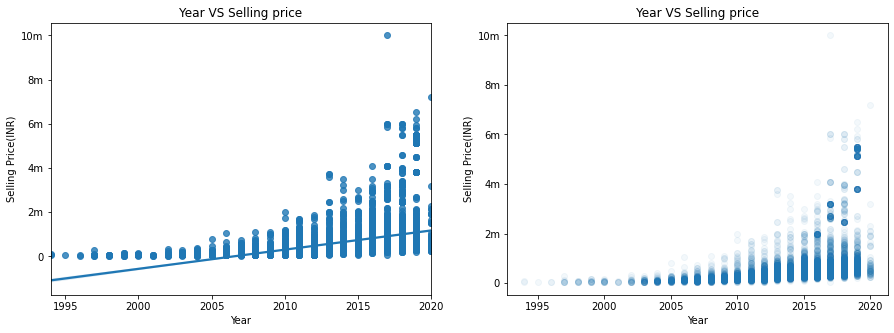

In [48]:
# Resize figure to accommodate two plots
plt.figure(figsize = [15, 5])


# Plot of Left - simple scatter
plt.subplot(1, 2, 1)
sb.regplot(data = car, x ='year', y='selling_price')
plt.title('Year VS Selling price')
plt.xlabel('Year')
plt.ylabel('Selling Price(INR)')
#convert the x-axis to a exponential figure
#The selling price at the left having 0.2(1e7) = 2e6 = 2million and same thing goes for 4,6,8,10.
plt.yticks([0, 2e6, 4e6, 6e6, 8e6, 10e6], [0, '2m','4m','6m','8m','10m'])

# Plot on Right - scatter
plt.subplot(1, 2, 2)

# In the sb.regplot() function below, the `truncate` argument accepts a boolean.
# If truncate=True, the regression line is bounded by the data limits. 
# Else if truncate=False, it extends to the x axis limits.

sb.regplot(data = car, x ='year', y='selling_price', truncate=False, fit_reg =False, scatter_kws ={'alpha':1/20}) 
plt.title('Year VS Selling price')
plt.xlabel('Year')
plt.ylabel('Selling Price(INR)')

#convert the x-axis to a exponential figure
#The selling price at the left having 0.2(1e7) = 2e6 = 2million and same thing goes for 4,6,8,10.
plt.yticks([0, 2e6, 4e6, 6e6, 8e6, 10e6], [0, '2m','4m','6m','8m','10m'])
plt.show();

The greater the year, the costler cars became. At around 2010, cars were less than 3million INR, and later increased gradually above 6million from 2017-2019

**QVB 7**

**Accertain if cars were sold and perhaps the seller type**

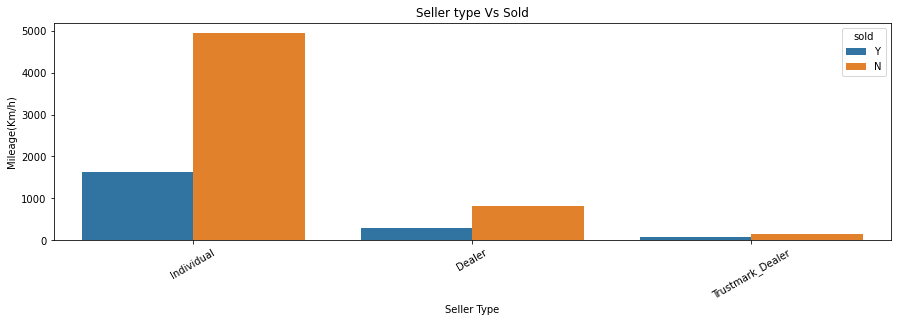

In [49]:
#Fixed figure size
plt.figure(figsize = [15, 4])
#Plot
sb.countplot(data = car, x = 'seller_type', hue = 'sold')

#Plot title,xlabel,ylabel ticks
plt.title('Seller type Vs Sold')
plt.xlabel('Seller Type')
plt.ylabel('Mileage(Km/h)')
plt.xticks(rotation=30);

Cars that are sold are lesser compared to the ones that aren't sold yet

## Multivariate Exploration

> In this section, i will create plots of three or more variables to investigate my data even
  further

**QVB 1**

**What are the cars with highest selling price and mileage**


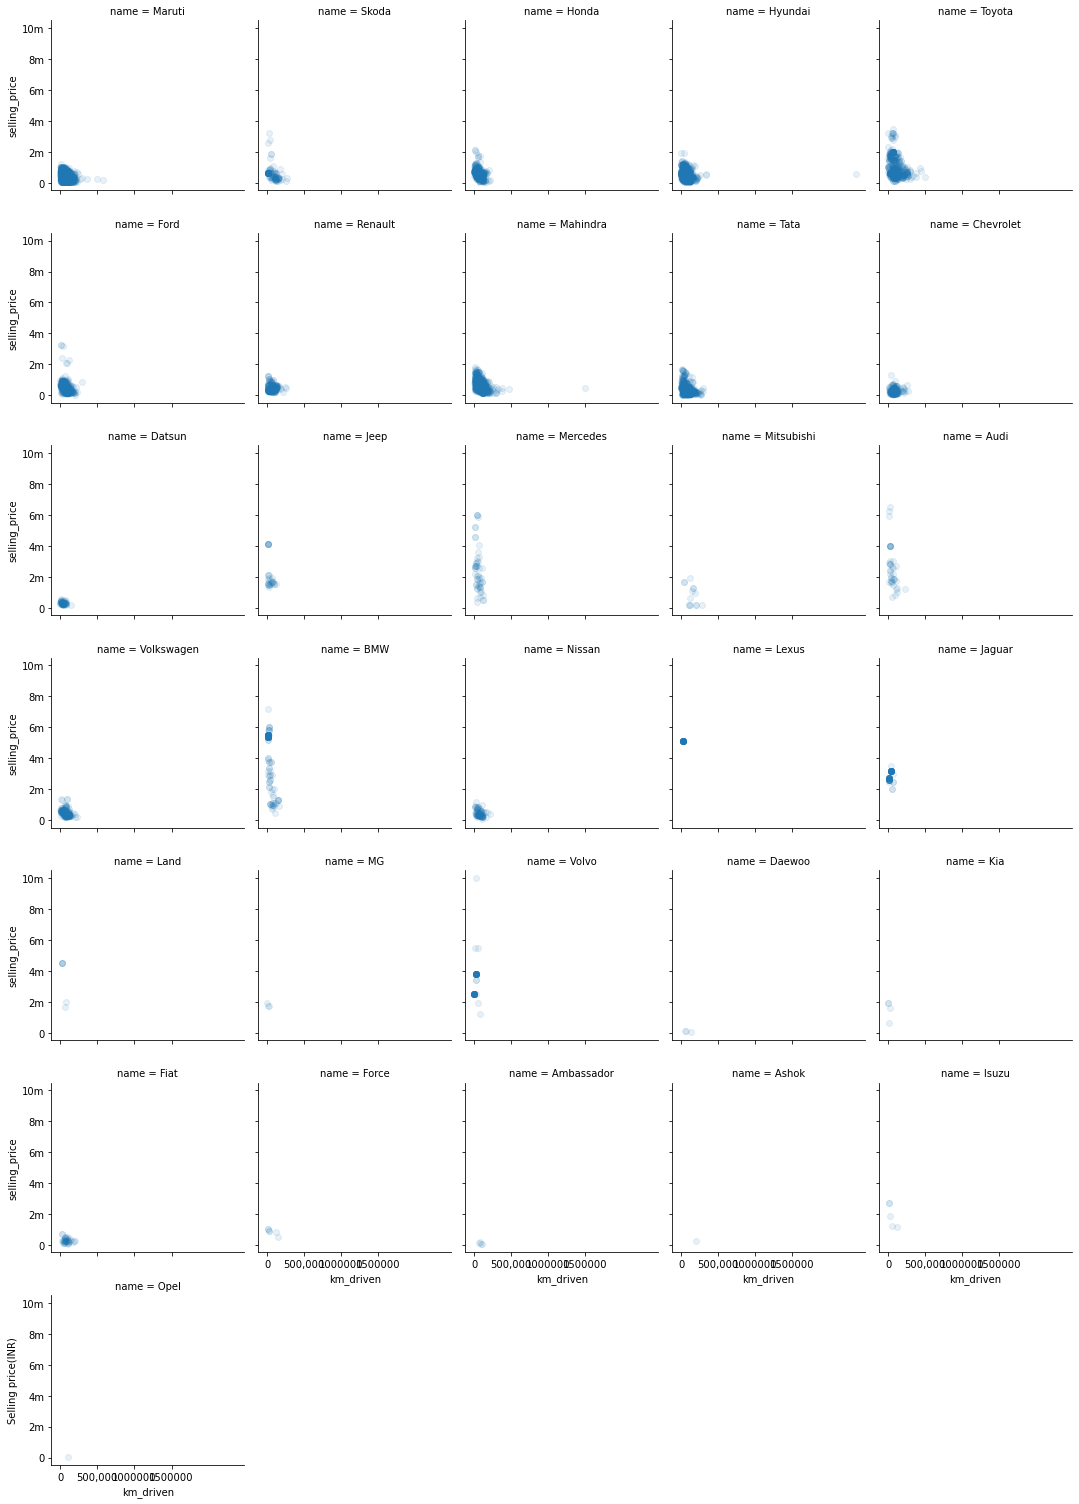

In [50]:
#Plot
g = sb.FacetGrid(data = car, col = 'name', col_wrap = 5)
g.map(plt.scatter, 'km_driven', 'selling_price', alpha=1/10)

#Plot title,xlabel,ylabel ticks, limits
#convert the x-axis to a exponential figure
#The km driven at the left having 1.0(1e6) = 1e6 = 1000000
plt.xticks([0, 0.5e6, 1.0e6, 1.5e6], [0, '500,000','1000000','1500000'])

ax.set_xlim([0, 1500000])
plt.ylabel('Selling price(INR)')
plt.yticks([0, 2e6, 4e6, 6e6, 8e6, 10e6], [0, '2m','4m','6m','8m','10m'])
plt.show();

* Most of the cars ranges from 0-500,000 in km as written earlier. 
* The first Ten facets are the cars that are more populated with points, but some Mercedes, Audi, BMW, and Volvo prices above 6million
* None of the above cars have moved more than 500,000km
> NOTE : The Mahindra may have moved moved 2,360,457km 

**QVB 2**

**Understanding in details the Selling price of cars by Year**

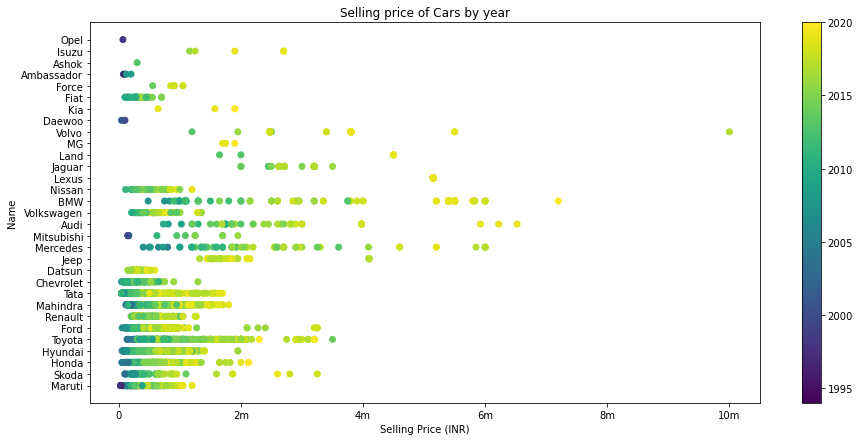

In [51]:
#Fixed figure size
plt.figure(figsize = [15, 7])

#Plot
plt.scatter(data = car, x = 'selling_price', y = 'name', c = 'year')

#Plot title,xlabel,ylabel ticks
plt.title('Selling price of Cars by year')
plt.xlabel('Selling Price (INR)')
plt.ylabel('Name')

#convert the x-axis to a exponential figure
#The selling price at the left having 1.0(1e6) = 1e6 = 1000000
plt.xticks([0, 2e6, 4e6, 6e6, 8e6, 10e6], [0, '2m','4m','6m','8m','10m'])
plt.colorbar()
plt.show()

The visualization above tell alot of story, but just to mention an interested few;

* Fewer cars was sold in the year 1995 and below at a price lesser than 1m INR
* Car prices increase with the ascending year.
* At around 2017 upwards, many of the car prices ranges from 1m to 8m (INR)

> NOTE : Volvo has an outstanding price of 10m INR 

**QVB 3**

**Understanding in details the State/Province of cars by Mileage and Km Driven**

<Figure size 576x360 with 0 Axes>

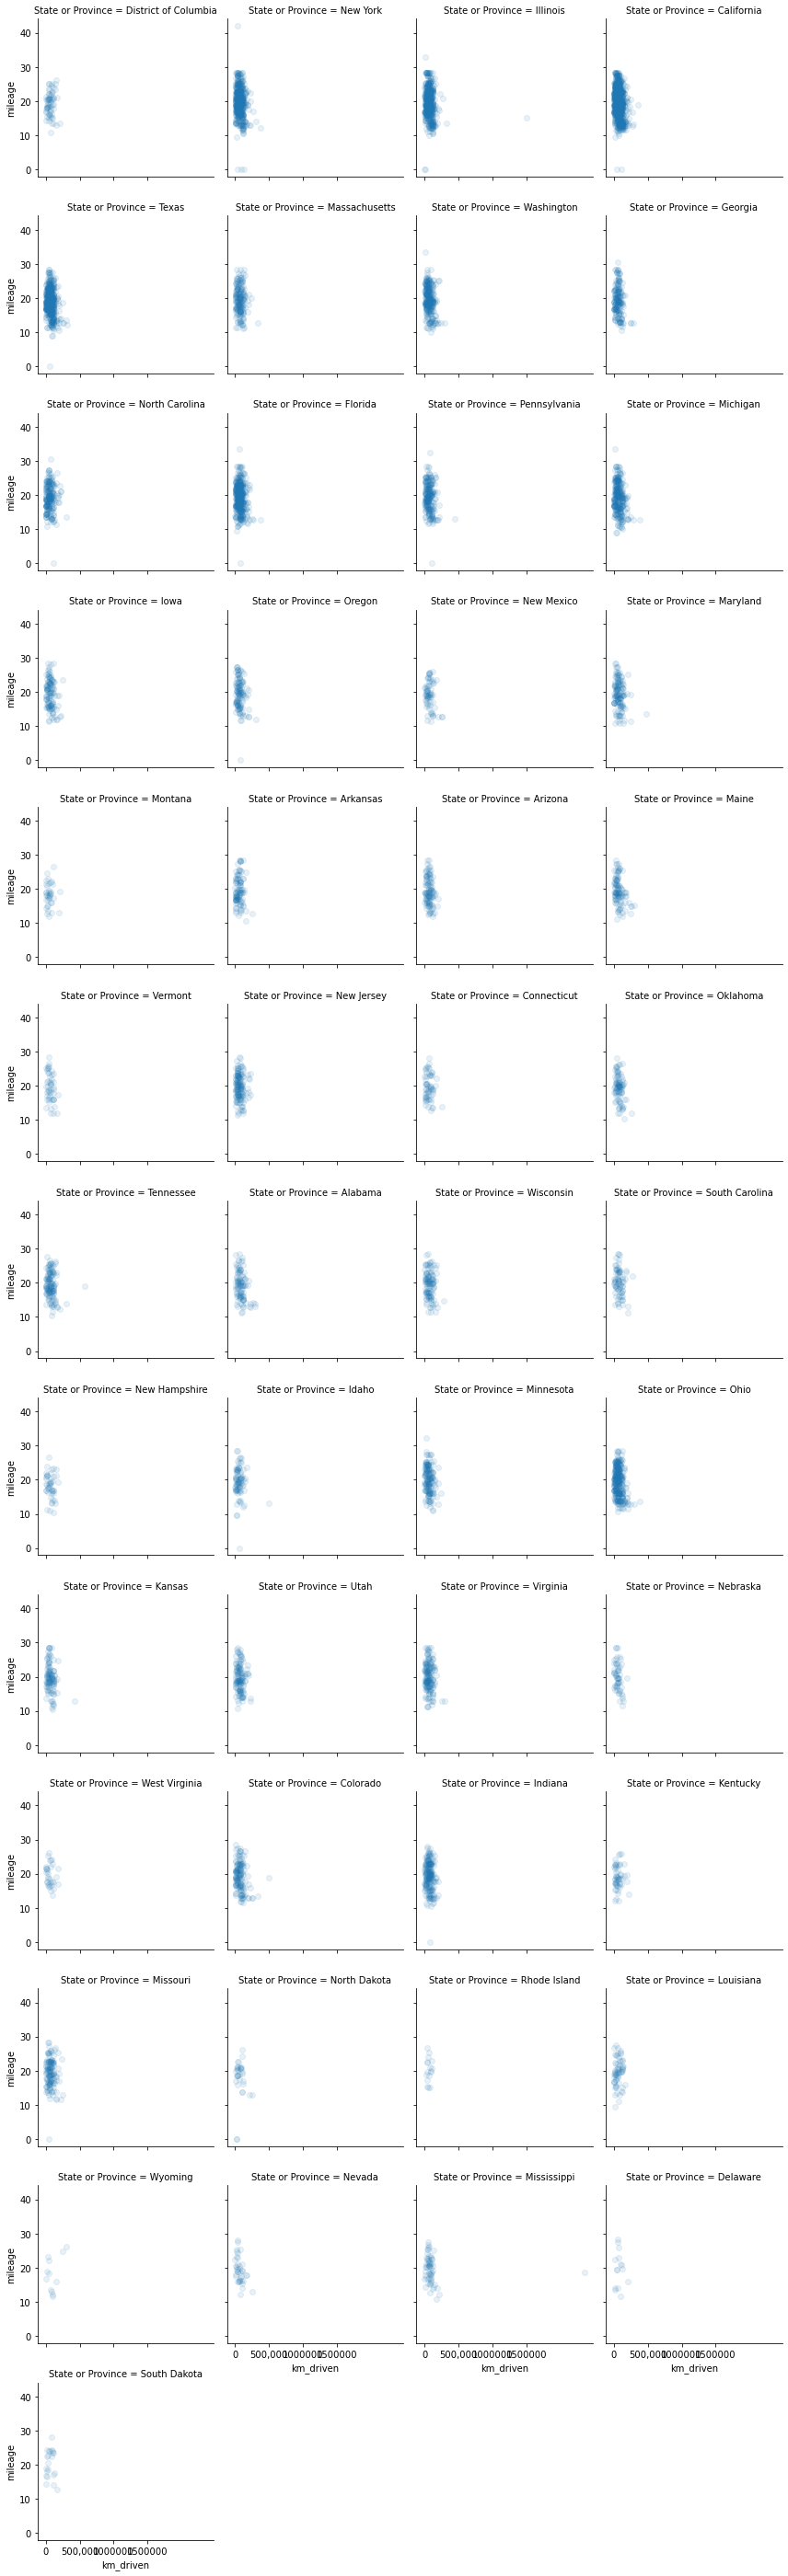

In [52]:
# Resize figure to accommodate plots
plt.figure(figsize = [8, 5])

#Plot
g = sb.FacetGrid(data = car, col = 'State or Province', col_wrap = 4)
g.map(plt.scatter, 'km_driven', 'mileage',alpha=1/10 )

#Plot xlimit, ticks
#convert the x-axis to a exponential figure
#The km driven at the left having 1.0(1e6) = 1e6 = 1000000
plt.xticks([0, 0.5e6, 1.0e6, 1.5e6], [0, '500,000','1000000','1500000'])
ax.set_xlim([0, 1500000])
plt.show();

* Almost all of the cars range from 0-500,000 in km except for some Maurati and Toyota greater than 500,000km
* Most of the cars have a mileage of above 10km/hr except for the Maurati cars having the highest mileage, above 30 km/hr
* California is tthe State or Province where points are more populated, after adding some transpearancy (alpha)

#### THE MARUTI CAR


> The Marati sounds more popular than the other cars but it clearly one of the cheapeast of them all

* It has the highest occurrence = 2367
* It has the highest year purchase occurrence = (2017), 1010
* It individual seller type is greater than 2000
* It uses Petrol more as its fuel
* It uses the manual mode of transmission graeter than 2000 by count
* It has a Km above the general km, 500,000km
* It has the highest mileage > 30km/hr

> Aside all the goodies above, 
* It is the car that have the highest count unsold above 1750 by count
* It is the car that have the highest count sold above 500 by count
* It is one of the cheapest cars less than 2million INR

## Conclusions

This is a large dataset of different types of used cars, trying to break through the market. There are thirty-one brands of cars which range accross Maruti, Hyundai, Tata, Mercedes, BMW, Toyota, just to mention but a few. Mileages and kilometer driven are great factors to be put into consideration in sales of used cars. The Higher the mileage, the faster the car, the higher the kilometer driven, the weaker the engine. Almost all of the cars range from 0-500,000 in km except for some Maurati and Toyota greater than 500,000km.

* The Maruti cars have the highest **mileage**, they are above 30 km/hr

* Maruti, Hyundai, Mahindra, Tata are clearly the cars with the most **individual Seller_Type**.

* Maruti and Hyundai, have petrol as their highest **fuel** usage, while; Toyota, Ford, Mahindra, Tata, are the cars with the highest Diesel usage 

* Maruti, Hyundai, Mahindra, Tata are the cars with the highest Manual **transmission**, and cars like Mercedes, BMW, Lexus, Jaguar, Volvo are the cars with the highest Automatic Transmission.

* Most of the used cars have not been **sold**. Marauti have the highest number of unsold cars followed by Hyundai, Mahindra, Tata...




Among many features it can be said that Year, Name, Region & State are categories which affect buying and selling of car. Fuel feature does not affect buying and selling of car. The greater the year, the costler cars became. At around 2010, cars were less than 3million INR, and later increased gradually above 6million INR from 2017-2019


* It is assumed that because most of the cars are purchased between 2017-2019 hence, less number of cars are being sold.

* Fewer cars was sold in the year 1995 and below at a price lesser than 1m INR

* Car prices increase with the ascending year.

### Shocking Insights

In [53]:
# Encoding Sold column so that it can be used in group by function and its relation with various features.

car['sold'] = car['sold'].map({'Y':1, 'N':0}).astype(int)
car.head()

,Sales_ID,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,seats,sold
0,1,Maruti,2014,450000,145500,East,District of Columbia,Washington,Diesel,Individual,Manual,First_Owner,23.40,1248,5,1
1,2,Skoda,2014,370000,120000,East,New York,New York City,Diesel,Individual,Manual,Second_Owner,21.14,1498,5,1
2,3,Honda,2006,158000,140000,Central,Illinois,Chicago,Petrol,Individual,Manual,Third_Owner,17.70,1497,5,1
3,4,Hyundai,2010,225000,127000,Central,Illinois,Chicago,Diesel,Individual,Manual,First_Owner,23.00,1396,5,1
4,5,Maruti,2007,130000,120000,East,New York,New York City,Petrol,Individual,Manual,First_Owner,16.10,1298,5,1


In [54]:
#Grouping cars by year with the numeric sold values Y=1, N=0

car[['year', 'sold']].groupby(['year'], as_index=False).mean().sort_values(by='sold', ascending=True)

,year,sold
1,1995,0.000000
2,1996,0.000000
3,1997,0.000000
4,1998,0.000000
13,2007,0.161850
14,2008,0.213930
5,1999,0.214286
12,2006,0.225490
24,2018,0.232010
20,2014,0.232258


In [55]:
#Grouping cars by name with the numeric sold values Y=1, N=0

car[["name", "sold"]].groupby(['name'], as_index=False).mean().sort_values(by='sold', ascending=False)

,name,sold
18,MG,0.666667
15,Kia,0.500000
23,Nissan,0.407407
5,Daewoo,0.333333
17,Lexus,0.323529
21,Mercedes,0.296296
13,Jaguar,0.295775
14,Jeep,0.290323
30,Volvo,0.283582
28,Toyota,0.278761


In [56]:
#Grouping cars by State or Provinceyear with the numeric sold values Y=1, N=0

car[["State or Province", "sold"]].groupby(['State or Province'], as_index=False).mean().sort_values(by='sold', ascending=True)

,State or Province,sold
48,Wyoming,0.000000
26,Nevada,0.000000
32,North Dakota,0.000000
16,Louisiana,0.000000
6,Delaware,0.000000
37,Rhode Island,0.000000
39,South Dakota,0.000000
22,Mississippi,0.000000
23,Missouri,0.021277
44,Virginia,0.029940


In [57]:
#Grouping cars by Fuel with the numeric sold values Y=1, N=0

car[["fuel", "sold"]].groupby(['fuel'], as_index=False).mean().sort_values(by='sold', ascending=True)

,fuel,sold
0,CNG,0.134615
2,LPG,0.171429
1,Diesel,0.244708
3,Petrol,0.265625


In [58]:
#Grouping cars by Region with the numeric sold values Y=1, N=0

car[["Region", "sold"]].groupby(['Region'], as_index=False).mean().sort_values(by='Region', ascending=True)

,Region,sold
0,Central,0.227273
1,East,0.324910
2,South,0.212384
3,West,0.246457


In [59]:
#Grouping cars by seller type with the numeric sold values Y=1, N=0

car[["seller_type", "sold"]].groupby(['seller_type'], as_index=False).mean().sort_values(by='sold', ascending=True)

,seller_type,sold
1,Individual,0.248210
0,Dealer,0.262873
2,Trustmark_Dealer,0.338983


### Future Research Direction



* Out of many brands present in the dataset there are 4 brands which are dominating the dataset and hence, relation of these 4     brands which sold feature needs to be investigated.

* Among states/province California has maximum as well as double the number of records from next highest state and hence,         relation of California with Sold feature needs to be investigated.

* Relation of Fuel with sold needs to be studied as there are almost equal number of petrol and diesel cars it will be             intresting to see their relation with sold.

* Relation of Individual seller with sold column needs to be studied as Individual seller is dominanting the category.

* Relation of Owner and sold feature needs to be studied.

* As kilometers of most of the cars were around 70,000 its relation with sold also needs to be checked.

* Relation of Region with sold will also be intresting as equal number of regions were present in the dataset.



> The above Notes should be further investigated, could be a type-error or outliers 
  * The Mahindra which have moved moved 2,360,457km
  * Volvo has an outstanding price of 10m INR
  * Volvo has an outstanding Mileage of above 40(M/D)